#Analysis

Input: qc_output.csv

Questions to answer: 
1. What is the average sentence length? Does having more differences between avatar pairs increase the average sentence length?
2. What are the most frequent words used? 


#Setup

In [ ]:
import pandas as pd

In [ ]:
# read in qc_output.csv
qc_output = pd.read_csv('qc_output.csv')

qc_output

,og_image,updated_image,descriptions,set,group
0,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/7ZcGKL5F/Avatar-Maker-1.png,"['Make the eyebrows thicker', 'Left avatar mus...",1,1
1,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/ydCJzrXn/Avatar-Maker-2.png,['Left avatar must open her eyes as widely as ...,1,2
2,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/vB748L0y/Avatar-Maker-3.png,['Open the mouth and show the teeth while smil...,1,3
3,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/XvLMVr9h/Avatar-Maker-4.png,['make the eyes open wide and round thicken th...,1,4
4,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/2yqgFTgR/Avatar-Maker-5.png,"['Make the eyes much larger and circular, open...",1,5
5,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/FRHM1hZK/Avatar-Maker-6.png,"['She was serious, but soon after she was happ...",1,6
6,https://i.postimg.cc/3wvyVHpd/Avatar-Maker.png,https://i.postimg.cc/fLq6912f/Avatar-Maker-7.png,"['Left avatar must open eyes very widely, smil...",1,7
7,https://i.postimg.cc/kGqP9Wpk/Avatar-Maker.png,https://i.postimg.cc/0yBvmMzw/Avatar-Maker-1.png,['Left avatar must have her eyebrows waxed to ...,2,1
8,https://i.postimg.cc/kGqP9Wpk/Avatar-Maker.png,https://i.postimg.cc/Zn77g3tP/Avatar-Maker-2.png,['Enlarge the eyes and make the pupils more vi...,2,2
9,https://i.postimg.cc/kGqP9Wpk/Avatar-Maker.png,https://i.postimg.cc/cHqN9pM1/Avatar-Maker-3.png,['Left avatar should shut her mouth! She shoul...,2,3


#1. Sentence Length

What is the total average sentence length?

In [ ]:
def avg_sentence_length(input):
  # converting the description string into list
  descriptions = input['descriptions'].apply(eval) 

  total_words = 0
  total_sentences = 0

  for d in descriptions:
    l = len(d)
    for x in range(l):
      total_sentences += 1
      total_words = total_words + len(d[x].split())

  avg_length = total_words/total_sentences
  return (avg_length)

avg_sentence_length(qc_output)

12.91358024691358

Average Sentence length per category:

There are three categories:
1. Groups 1,2,3 represent one difference between the avatars
2. Groups 4, 5, 6 represent two differences between avatar pairs
3. Group 7 represents three differences between avatar pairs

Question to answer: What is the average sentence length for each category? Would more differences equate to longer sentences?


In [ ]:
c1 = qc_output.loc[qc_output['group'] <= 3]
c2 = qc_output.loc[(qc_output['group'] > 3) & (qc_output['group'] <= 6)]
c3 = qc_output.loc[qc_output['group'] == 7]

print(avg_sentence_length(c1)) #10.733333333333333
print(avg_sentence_length(c2)) #13.1
print(avg_sentence_length(c3)) #18.181818181818183

10.733333333333333
13.1
18.181818181818183


Graph!

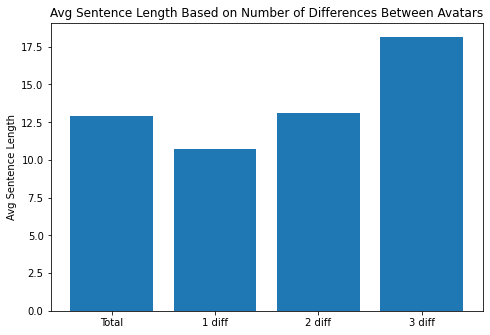

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cat = ['Total', '1 diff', '2 diff', '3 diff']
sen_len = [12.91,10.73,13.1,18.18]
ax.bar(cat,sen_len)
ax.set_ylabel('Avg Sentence Length')
ax.set_title('Avg Sentence Length Based on Number of Differences Between Avatars')
plt.show()

Based on our results, it does appear that the average sentence length increases when there are more differences between avatar pairs!

##2. Most Frequent Words Used

All sentences combined

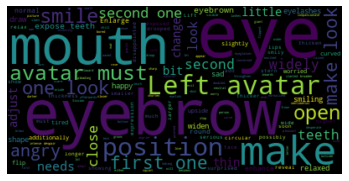

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#combine all sentences into one long text
def combine_text(input):
  text2 = " "
  descriptions = input['descriptions'].apply(eval) 
  for d in descriptions:
    l = len(d)
    for x in range(l):
      text2 = text2 + " " + d[x]
  return text2

text = combine_text(qc_output)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Create World Clouds for each category, that is: 

Category 1: one difference between avatar pairs

Category 2: two differences between avatar pairs

Category 3: three differences between avatar pairs

Question: 

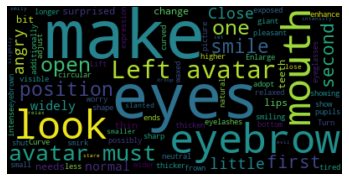

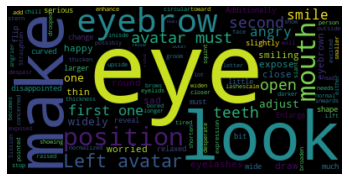

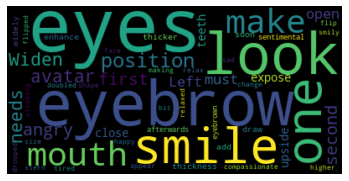

In [ ]:
#Category 1
c1_text = combine_text(c1)
# Create and generate a word cloud image:
wordcloud_c1 = WordCloud().generate(c1_text)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

#Category 2
c2_text = combine_text(c2)
# Create and generate a word cloud image:
wordcloud_c2 = WordCloud().generate(c2_text)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#Category 3
c3_text = combine_text(c3)
# Create and generate a word cloud image:
wordcloud_c3 = WordCloud().generate(c3_text)

# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()


Create Word Clouds for each Group: There are 7 groups with the differences between pairs as follows: 
1. eyebrow
2. eye
3. mouth
4. eyebrow eye
5. eye mouth
6. eyebrow mouth
7. eyebrow eye mouth



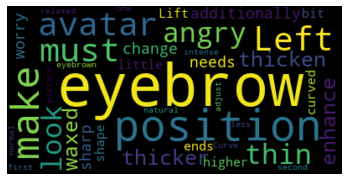

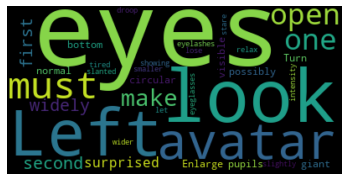

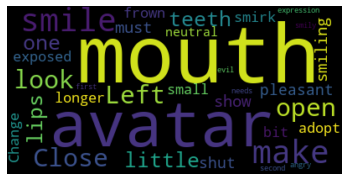

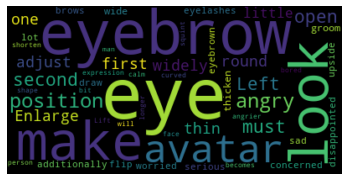

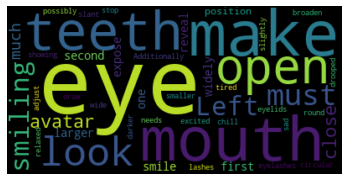

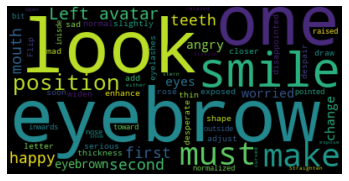

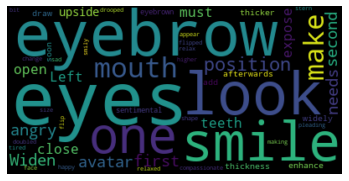

In [ ]:
# create the groups
g1 = qc_output.loc[qc_output['group'] == 1]
g2 = qc_output.loc[qc_output['group'] == 2]
g3 = qc_output.loc[qc_output['group'] == 3]
g4 = qc_output.loc[qc_output['group'] == 4]
g5 = qc_output.loc[qc_output['group'] == 5]
g6 = qc_output.loc[qc_output['group'] == 6]
g7 = qc_output.loc[qc_output['group'] == 7]

#G1
g1_text = combine_text(g1)
# Create and generate a word cloud image:
wordcloud_g1 = WordCloud().generate(g1_text)

# Display the generated image:
plt.imshow(wordcloud_g1, interpolation='bilinear')
plt.axis("off")
plt.show()

#G2
g2_text = combine_text(g2)
# Create and generate a word cloud image:
wordcloud_g2 = WordCloud().generate(g2_text)

# Display the generated image:
plt.imshow(wordcloud_g2, interpolation='bilinear')
plt.axis("off")
plt.show()

#G3
g3_text = combine_text(g3)
# Create and generate a word cloud image:
wordcloud_g3 = WordCloud().generate(g3_text)

# Display the generated image:
plt.imshow(wordcloud_g3, interpolation='bilinear')
plt.axis("off")
plt.show()

#G4
g4_text = combine_text(g4)
# Create and generate a word cloud image:
wordcloud_g4 = WordCloud().generate(g4_text)

# Display the generated image:
plt.imshow(wordcloud_g4, interpolation='bilinear')
plt.axis("off")
plt.show()

#G5
g5_text = combine_text(g5)
# Create and generate a word cloud image:
wordcloud_g5 = WordCloud().generate(g5_text)

# Display the generated image:
plt.imshow(wordcloud_g5, interpolation='bilinear')
plt.axis("off")
plt.show()

#G6
g6_text = combine_text(g6)
# Create and generate a word cloud image:
wordcloud_g6 = WordCloud().generate(g6_text)

# Display the generated image:
plt.imshow(wordcloud_g6, interpolation='bilinear')
plt.axis("off")
plt.show()

#G7
g7_text = combine_text(g7)
# Create and generate a word cloud image:
wordcloud_g7 = WordCloud().generate(g7_text)

# Display the generated image:
plt.imshow(wordcloud_g7, interpolation='bilinear')
plt.axis("off")
plt.show()
